In [1]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups 
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np
import nltk
import re
#!pip install ntlk

In [31]:
with open('movie_summaries_bottom_250.txt', 'r') as myfile:
    summary=myfile.readlines()
with open('movie_titles_bottom_250.txt', 'r') as my_file:
    titles=my_file.readlines()

    from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
!pip install mpld3
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
additional=[':anonymous', "'s","'a",':anonym']
stopwords.extend(additional)

In [34]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [35]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [36]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [37]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in summary:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [38]:
len(totalvocab_stemmed)
len(totalvocab_tokenized)

29097

In [39]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

'there are 29097 items in vocab_frame'

In [40]:
#for printing words for wordclouds
#our word cloud generator used the stems but we wanted to use the full words (eg. "tries" rather than "tri")
#so we use the vocab_frame from here to get the full words
#we use this code to print out the words and them stick them in an external word cloud generator
#https://www.wordclouds.com
terms = [["friend", "girl", "find", "want", "tri", "shark", "kill", "turn", "becom", "world", "get", "stori", "woman", "love", "power"], ["take", "life", "young", "kill", "famili", "get", "back", "man", "find", "evil", "onli", "love", "decid", "father", "friend"], ["evil", "find", "world", "get", "back", "time", "friend", "babi", "must", "take", "young", "life", "girl", "way", "group"]]
for termlist in terms:
    for i, term in enumerate(termlist):
        termlist[i] = vocab_frame.loc[term.split(' ')].values.tolist()[0][0]
for term in terms:
    temp = []
    for i in range(len(term)):
        temp += [j for j in term[:i+1]]*(len(term)//(i+1)+1)
    temp = " ".join(temp)
    print(temp)    

friend friend friend friend friend friend friend friend friend friend friend friend friend friend friend friend friend girls friend girls friend girls friend girls friend girls friend girls friend girls friend girls friend girls find friend girls find friend girls find friend girls find friend girls find friend girls find friend girls find wants friend girls find wants friend girls find wants friend girls find wants friend girls find wants trying friend girls find wants trying friend girls find wants trying friend girls find wants trying friend girls find wants trying shark friend girls find wants trying shark friend girls find wants trying shark friend girls find wants trying shark killed friend girls find wants trying shark killed friend girls find wants trying shark killed friend girls find wants trying shark killed turn friend girls find wants trying shark killed turn friend girls find wants trying shark killed turn become friend girls find wants trying shark killed turn become fri

In [41]:
vocab_frame.head()

,words
the,'the
emoji,emoji
movi,movie
unlock,unlocks
the,the


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary) #fit the vectorizer to summary

print(tfidf_matrix.shape)

Wall time: 787 ms
(249, 35)


In [43]:
terms = tfidf_vectorizer.get_feature_names()
terms

['becom',
 'befor',
 'come',
 'decid',
 'evil',
 'father',
 'forc',
 'friend',
 'girl',
 'group',
 'help',
 'howev',
 'kill',
 'life',
 'live',
 'love',
 'make',
 'man',
 'new',
 'onli',
 'order',
 'peopl',
 'plan',
 'power',
 'save',
 'stori',
 'time',
 'tri',
 'turn',
 'use',
 'want',
 'way',
 'world',
 'year',
 'young']

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [45]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 91.4 ms


In [46]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [47]:
df=pd.read_csv('Combine_bottom.csv')
title=df['Title']
rank=df.index

In [48]:
films = {  'cluster': clusters}

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster'])
frame['rank']=rank[0:249]

In [49]:
frame['title']=pd.Series(titles).values

In [50]:
frame.head()

,rank,title,cluster
1,0,The Emoji Movie\n,1
0,1,Nothing to Lose\n,0
2,2,Battlefield Earth\n,2
0,3,Dragonball: Evolution\n,0
2,4,Jaws: The Revenge\n,2


In [51]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

0    118
2     68
1     63
Name: cluster, dtype: int64

In [52]:
grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

cluster
0    125.703390
1    107.380952
2    136.441176
Name: rank, dtype: float64

In [53]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'evil', b'group', b'world', b'powerful', b'save', b'time',

Cluster 0 titles: Nothing to Lose
, Dragonball: Evolution
, Left Behind
, Troll 2
, Code Name: K.O.Z.
, Epic Movie
, Son of the Mask
, House of the Dead
, Saving Christmas
, Texas Chainsaw Massacre: The Next Generation
, Alone in the Dark
, Far Cry
, Birdemic: Shock and Terror
, The Master of Disguise
, Manos: The Hands of Fate
, Attack of the Jurassic Shark
, Baby Geniuses
, Superbabies: Baby Geniuses 2
, Daddy Day Camp
, The NeverEnding Story III
, Dirty Movie
, Teen Wolf Too
, Police Academy: Mission to Moscow
, Cool as Ice
, Steel
, Daniel the Wizard
, BloodRayne: The Third Reich
, Space Mutiny
, Breaking Wind
, Doogal
, Andron
, Celebrity Sex Tape
, 3 Ninjas: High Noon at Mega Mountain
, Jism 2
, Feardotcom
, Birdemic 2: The Resurrection
, Fred 3: Camp Fred
, InAPPropriate Comedy
, The King of Fighters
, United Passions
, Theodore Rex
, Muck
, Laserblast
, In the Name of the King:

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [54]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [60]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'evil, group, world', 
                 1: 'life, friend, become', 
                 2: 'girls, killed, young', 
                 3: 'evil, world, save', 
                 4: 'group,story,people'}

#b'girls', b'making', b'wants', b'friend', b'father', b'year'
#b'world', b'become', b'powerful', b'time', b'killed', b'using',
#b'life', b'trying', b'turn', b'new', b'only', b'love',
#b'evil', b'world', b'save', b'help', b'forces', b'before',
#b'group', b'story', b'people', b'friend', b'young', b'comes',

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


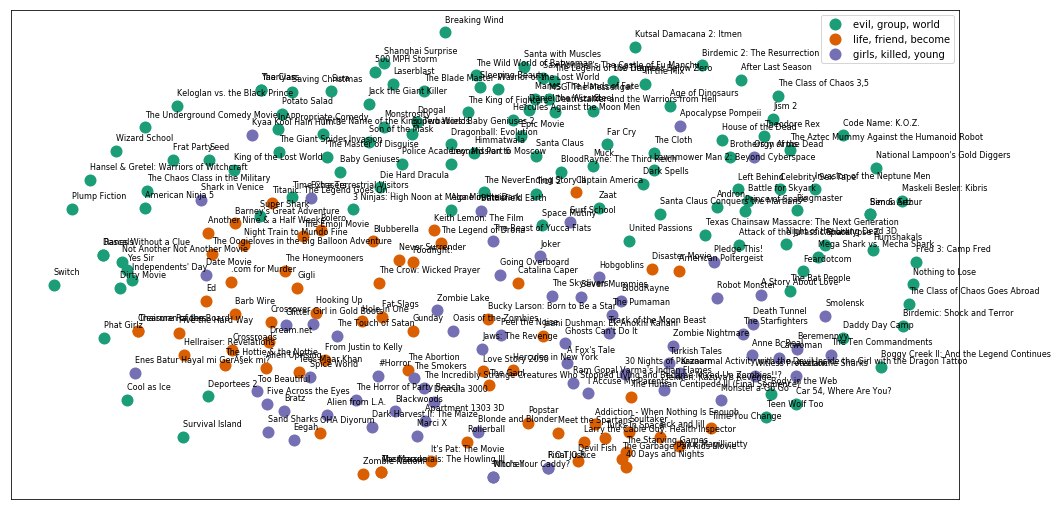

In [61]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [62]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [63]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

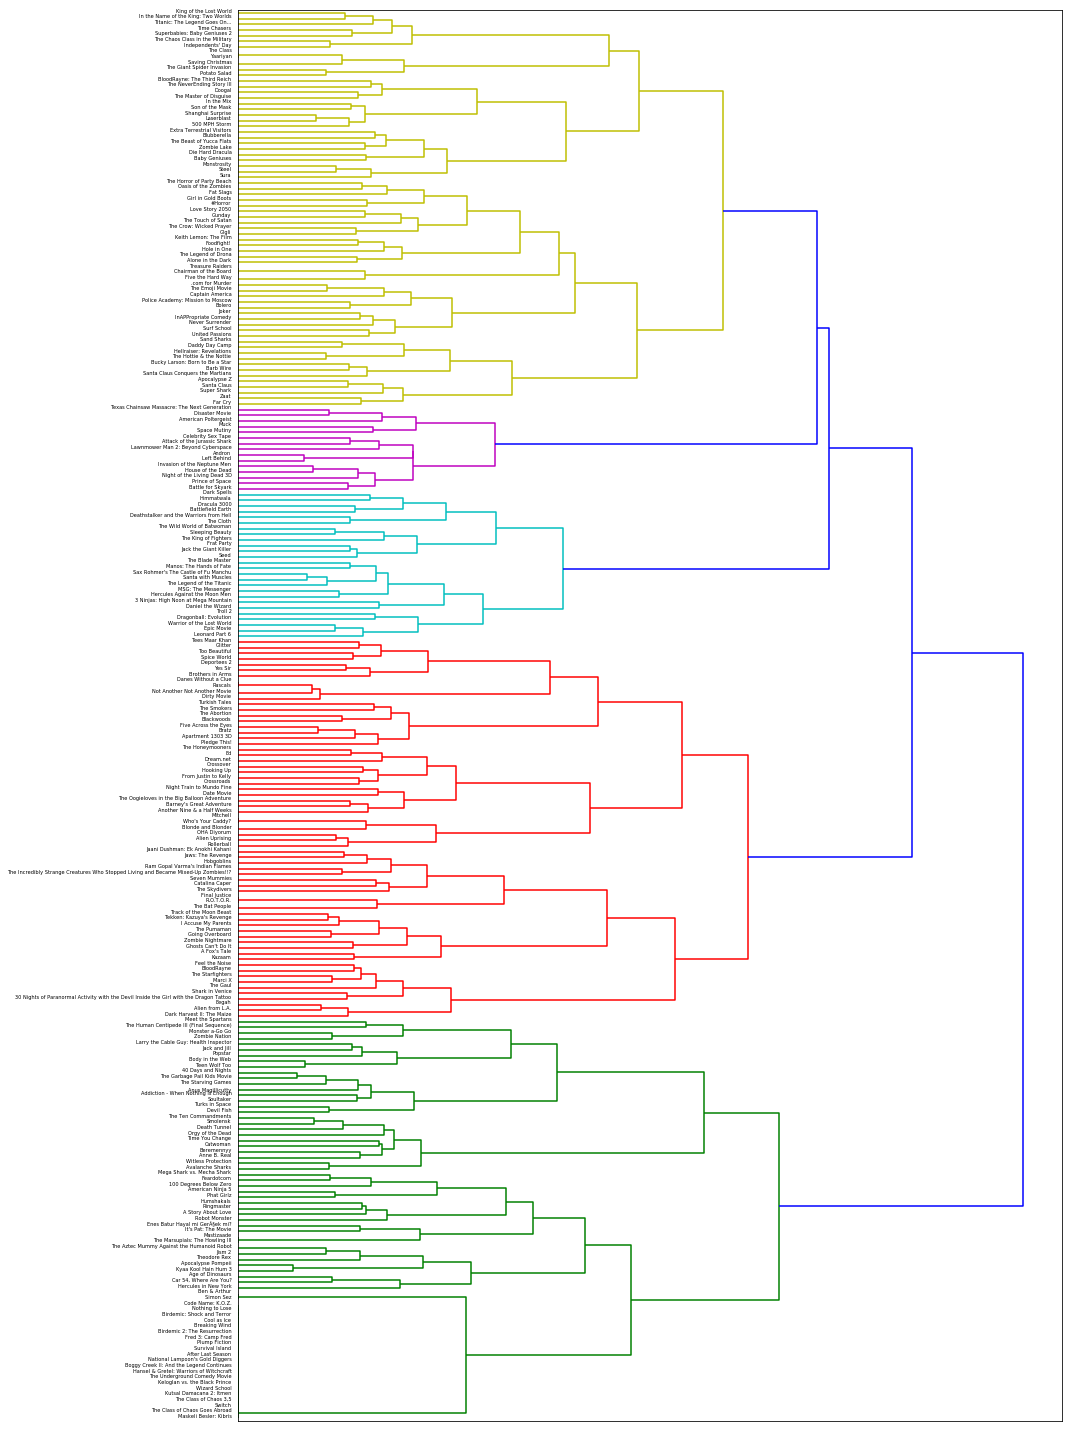

In [64]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters